In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
col = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']

df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\unlabeled.csv", names = col)

In [3]:
df.head(3)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,24667,529,512,262,432,92,3,1,1,0
1,24668,150,0,0,150,0,0,0,0,0
2,24669,227,236,57,204,21,1,1,0,0


In [4]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,24853.000000,239.815013,95.482574,13.227882,223.946381,13.844504,1.252011,0.348525,0.265416,0.107239
std,107.820066,294.734773,214.140550,46.270349,280.074591,24.723361,2.373867,1.035254,1.763370,0.522891
min,24667.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24760.000000,92.000000,4.000000,0.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,24853.000000,191.000000,9.000000,1.000000,181.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,24946.000000,293.000000,39.000000,11.000000,274.000000,16.000000,1.000000,0.000000,0.000000,0.000000
max,25039.000000,4410.000000,1979.000000,753.000000,4315.000000,234.000000,21.000000,8.000000,22.000000,6.000000


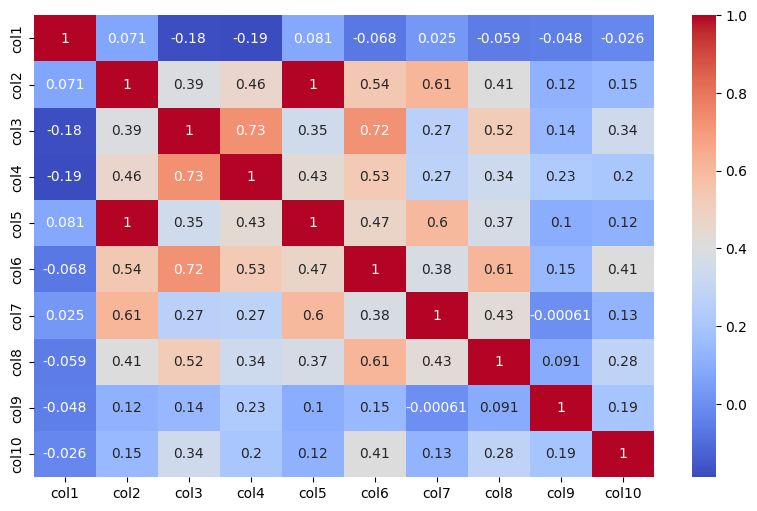

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = df.drop(columns=['col1', 'col10', 'col9'])
for col in x.select_dtypes(include=['int64', 'float64']).columns:
    mms.fit(x[[col]])
    x[col] = mms.transform(x[[col]])

## K Mean Clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

  File "C:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\sub

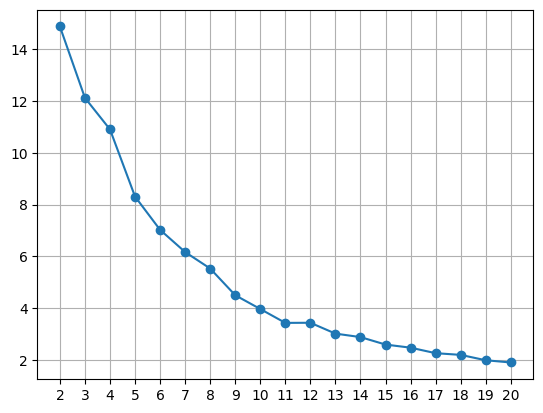

In [9]:
plt.plot([i for i in range(2, 21)], wcss, marker='o')
plt.xticks([i for i in range(2, 21)])
plt.grid()
plt.show()

In [10]:
kmn = KMeans(n_clusters=3)
x['output'] = kmn.fit_predict(x)

In [11]:
x.head()

,col2,col3,col4,col5,col6,col7,col8,output
0,0.118556,0.258717,0.347942,0.098654,0.393162,0.142857,0.125,1
1,0.032478,0.000000,0.000000,0.033194,0.000000,0.000000,0.000,2
2,0.049966,0.119252,0.075697,0.045729,0.089744,0.047619,0.125,0
3,0.023620,0.000000,0.000000,0.024141,0.000000,0.000000,0.000,2
4,0.046786,0.000000,0.000000,0.045729,0.038462,0.000000,0.000,2


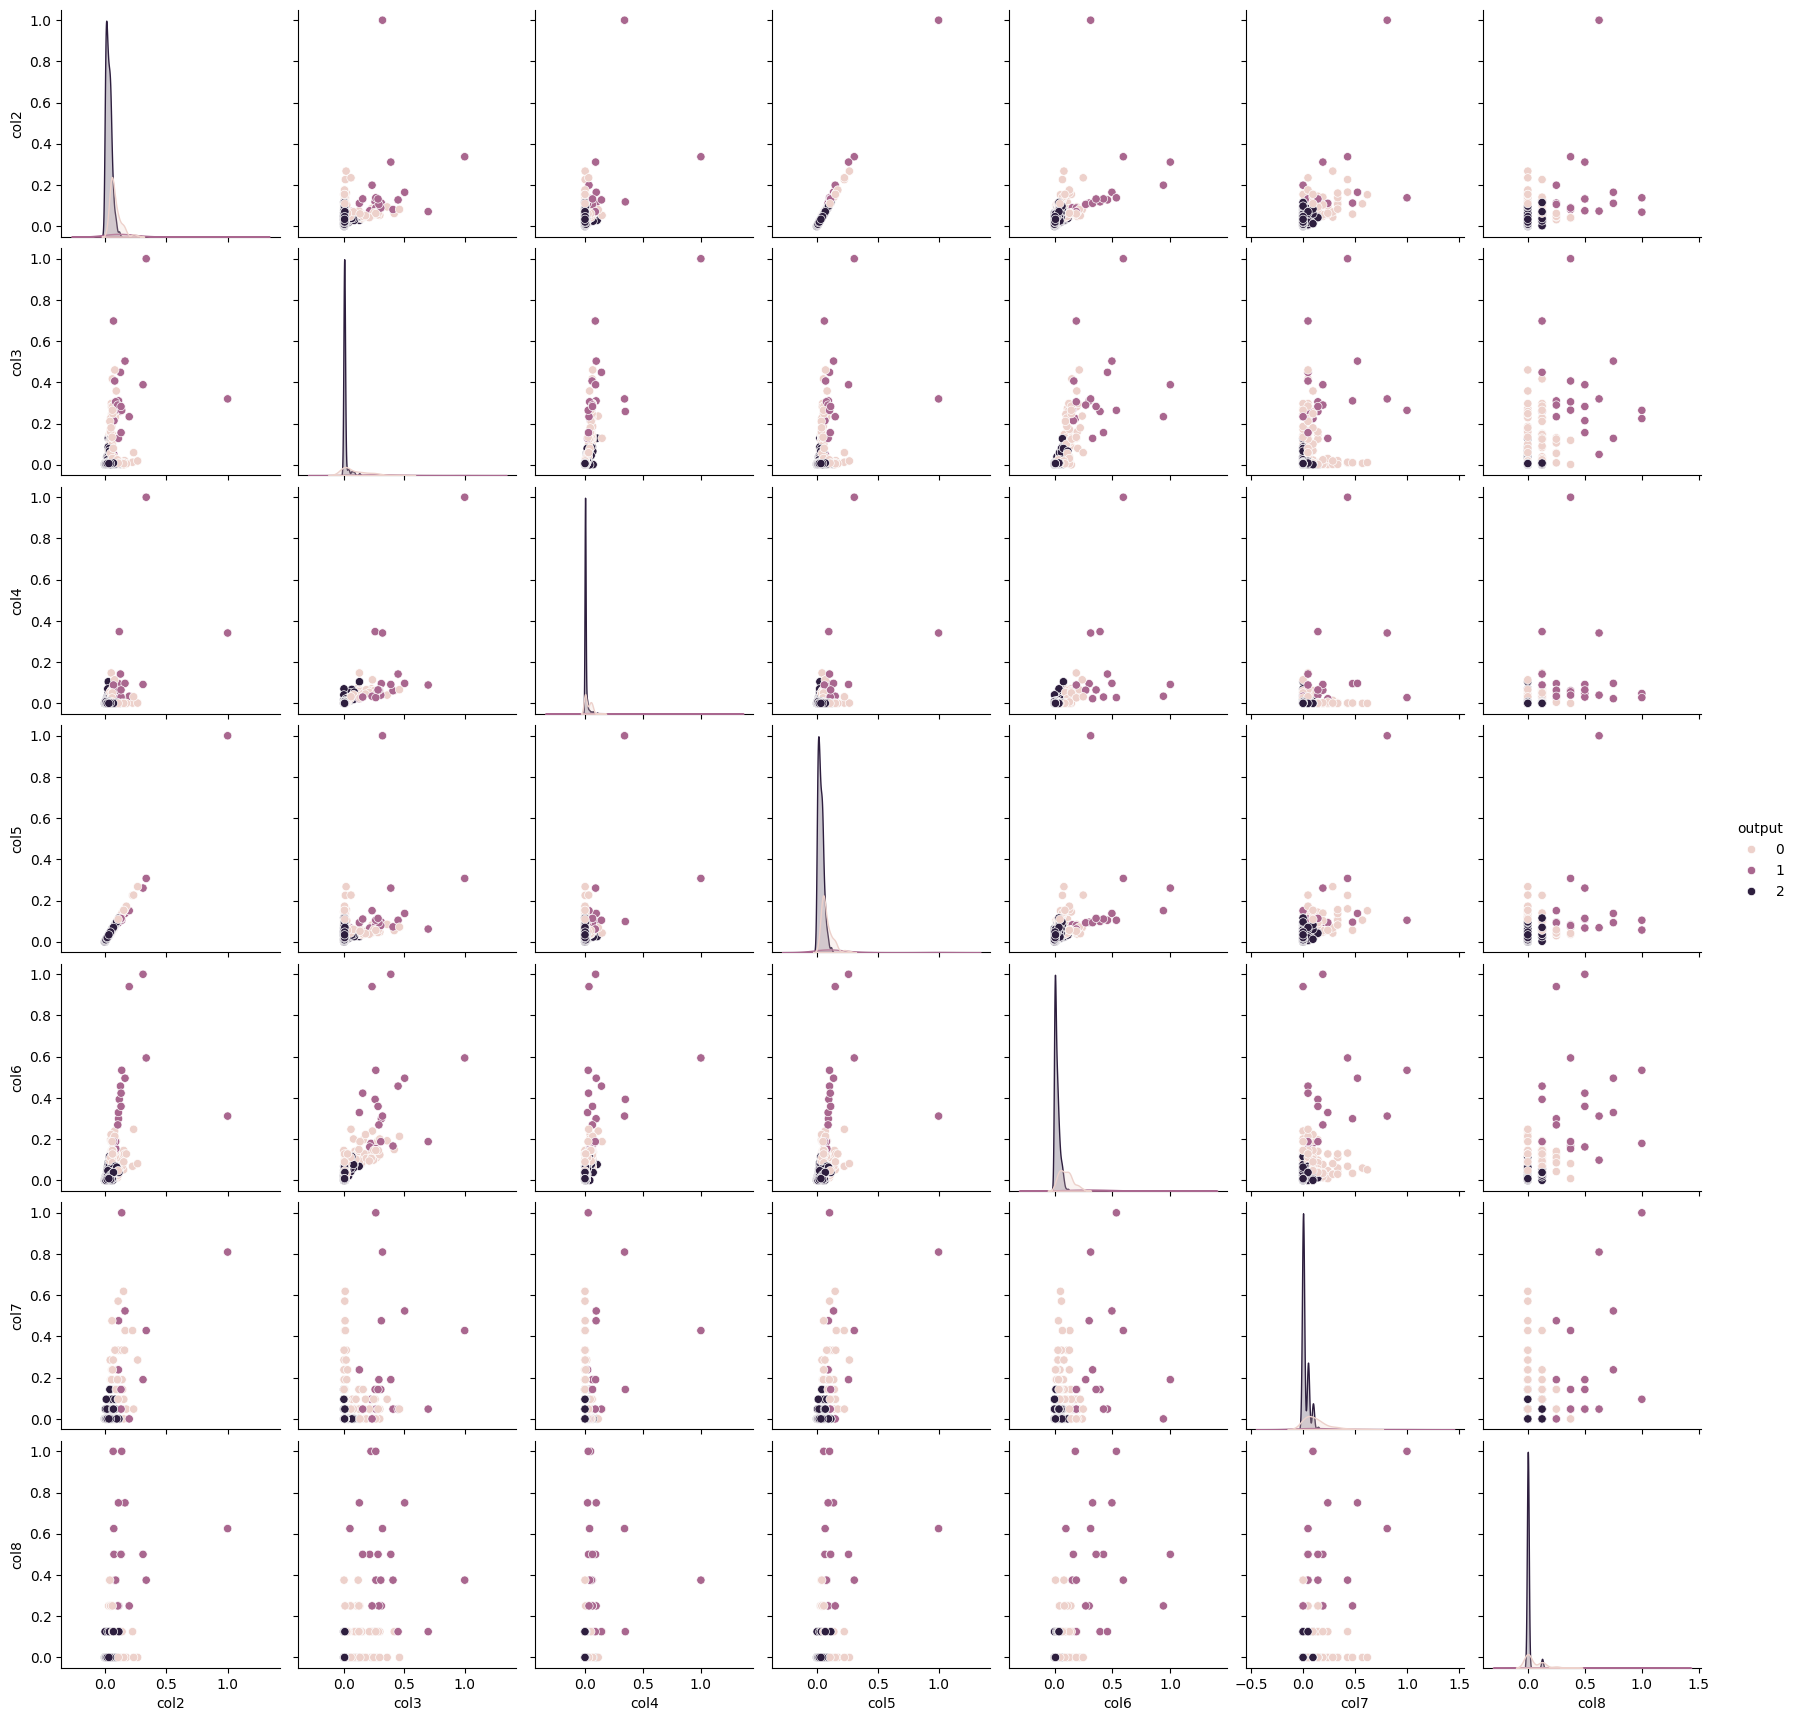

In [12]:
sns.pairplot(data=x, hue='output')
plt.show()

## Hierarchical Clustering => Linear Data

### Agglomerative Clustering

In [13]:
x = x.drop(columns='output')

In [14]:
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

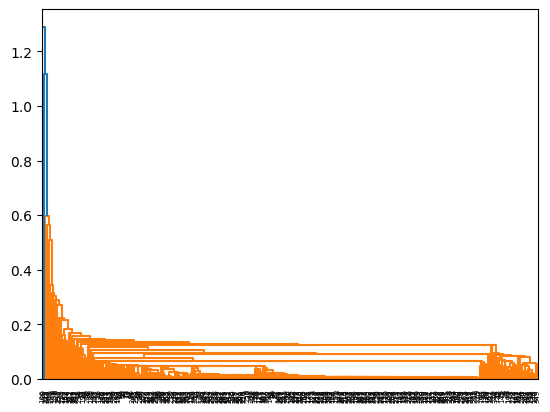

In [15]:
sc.dendrogram(sc.linkage(x, method='single'))
plt.show()

In [16]:
ac = AgglomerativeClustering(n_clusters=3, linkage='single')
x['output'] = ac.fit_predict(df)

In [17]:
x.head()

,col2,col3,col4,col5,col6,col7,col8,output
0,0.118556,0.258717,0.347942,0.098654,0.393162,0.142857,0.125,0
1,0.032478,0.000000,0.000000,0.033194,0.000000,0.000000,0.000,0
2,0.049966,0.119252,0.075697,0.045729,0.089744,0.047619,0.125,0
3,0.023620,0.000000,0.000000,0.024141,0.000000,0.000000,0.000,0
4,0.046786,0.000000,0.000000,0.045729,0.038462,0.000000,0.000,0


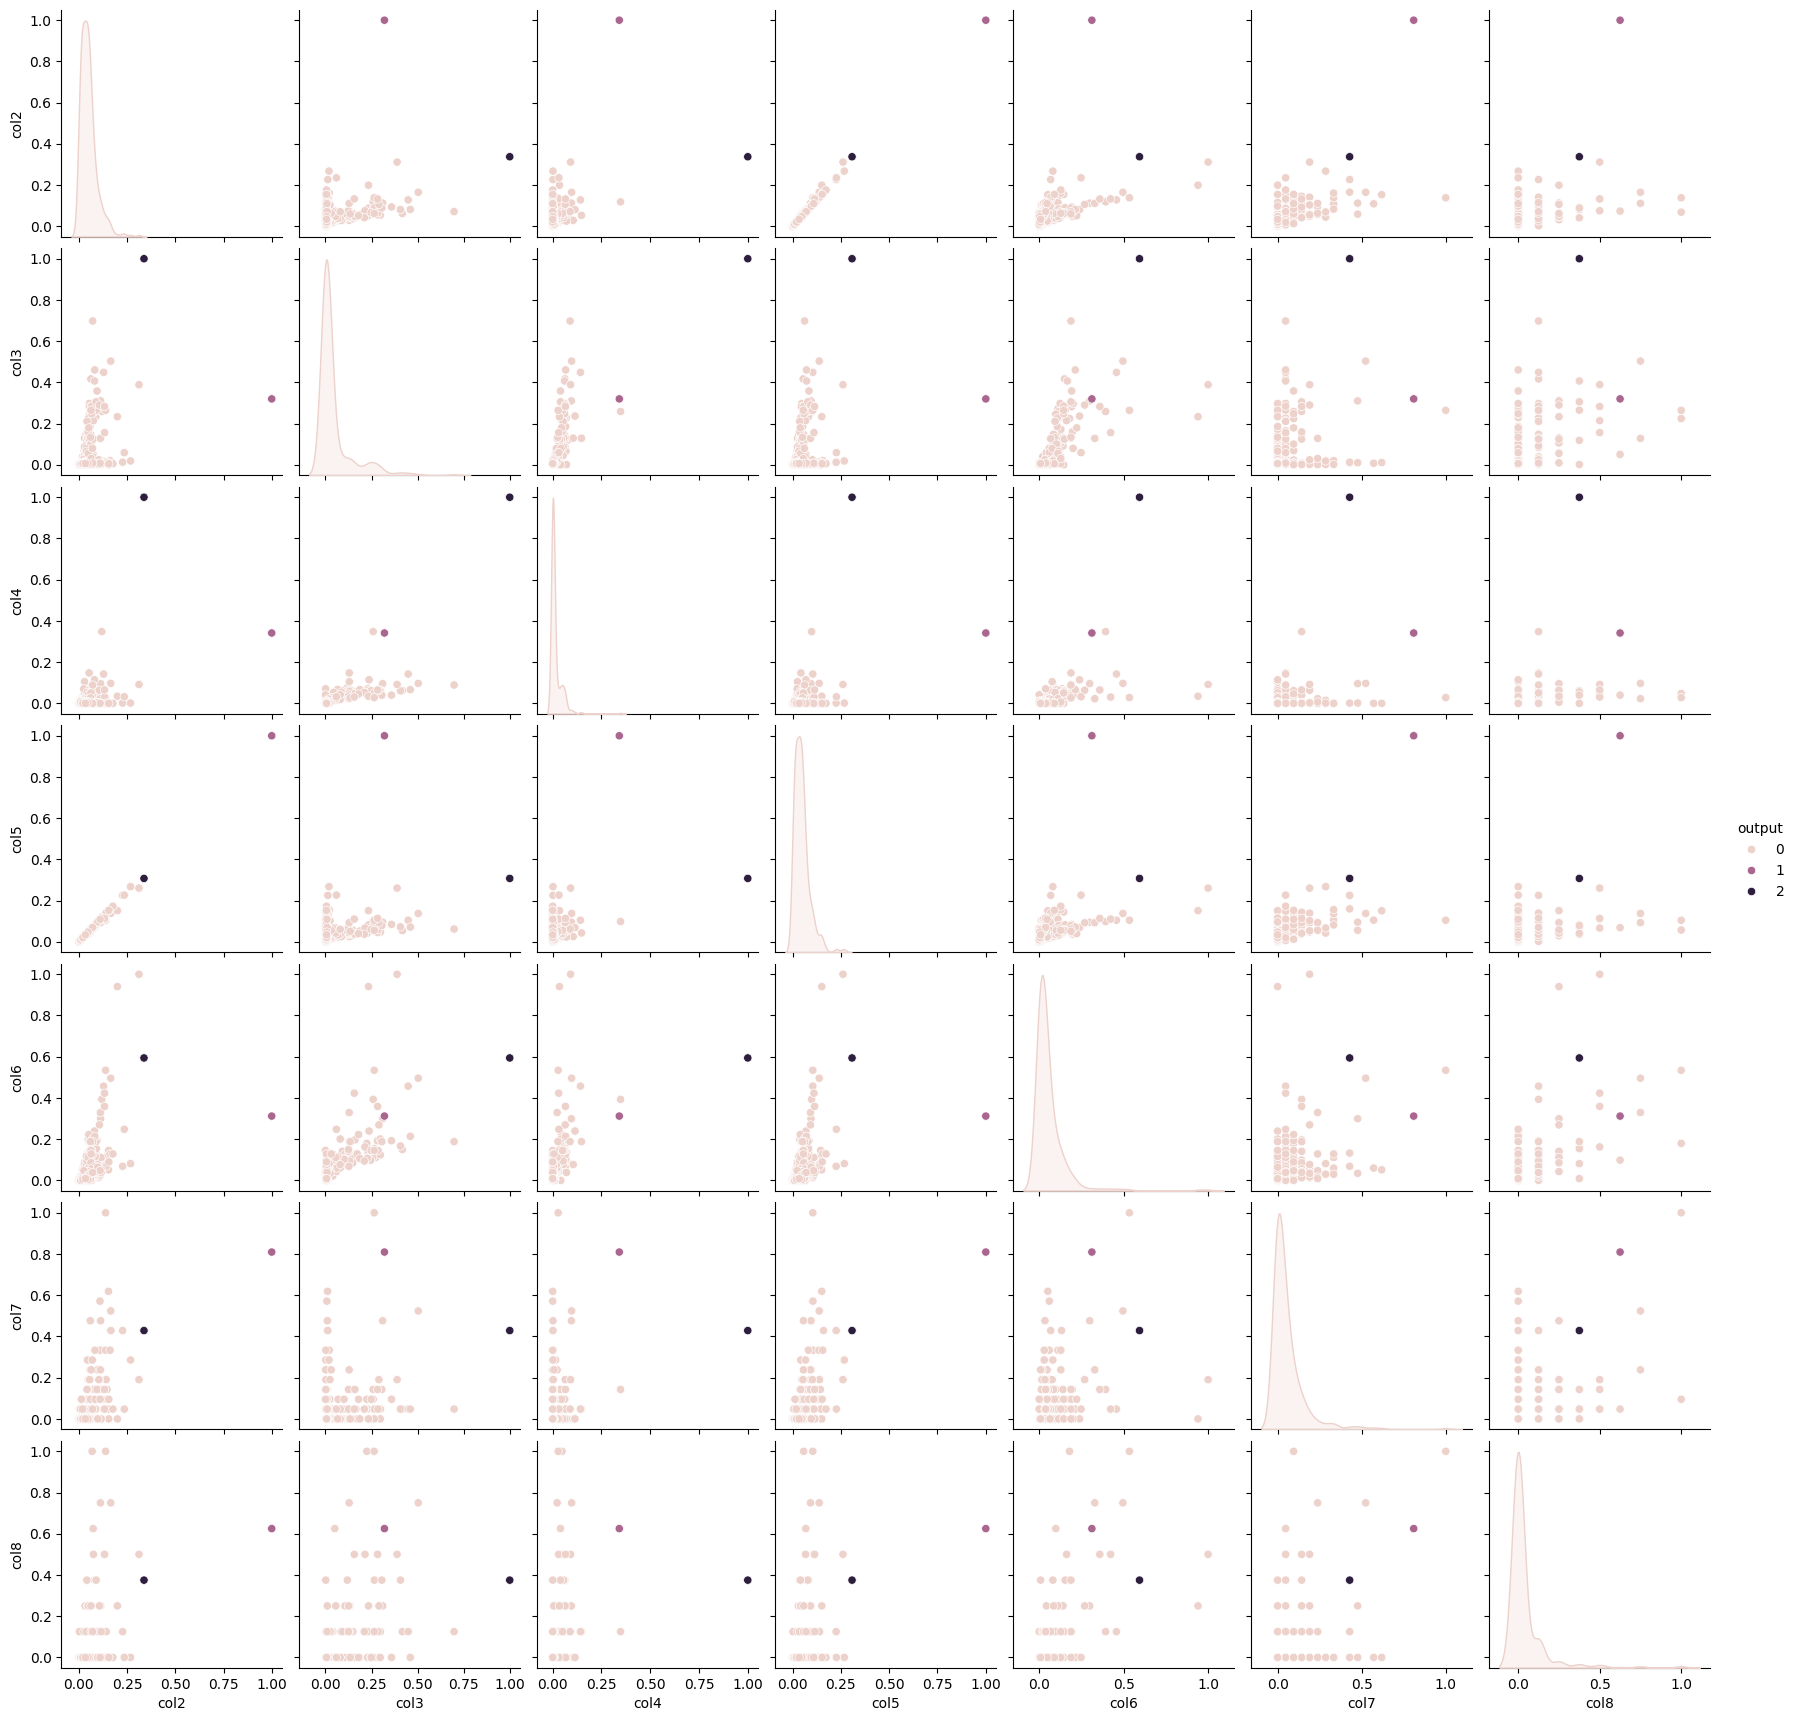

In [18]:
sns.pairplot(data=x, hue='output')
plt.show()

## DBSCAN Clustering

In [21]:
x = x.drop(columns='output')

In [23]:
x.head(2)

,col2,col3,col4,col5,col6,col7,col8
0,0.118556,0.258717,0.347942,0.098654,0.393162,0.142857,0.125
1,0.032478,0.000000,0.000000,0.033194,0.000000,0.000000,0.000


In [26]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=3)
x['output'] = db.fit_predict(x)

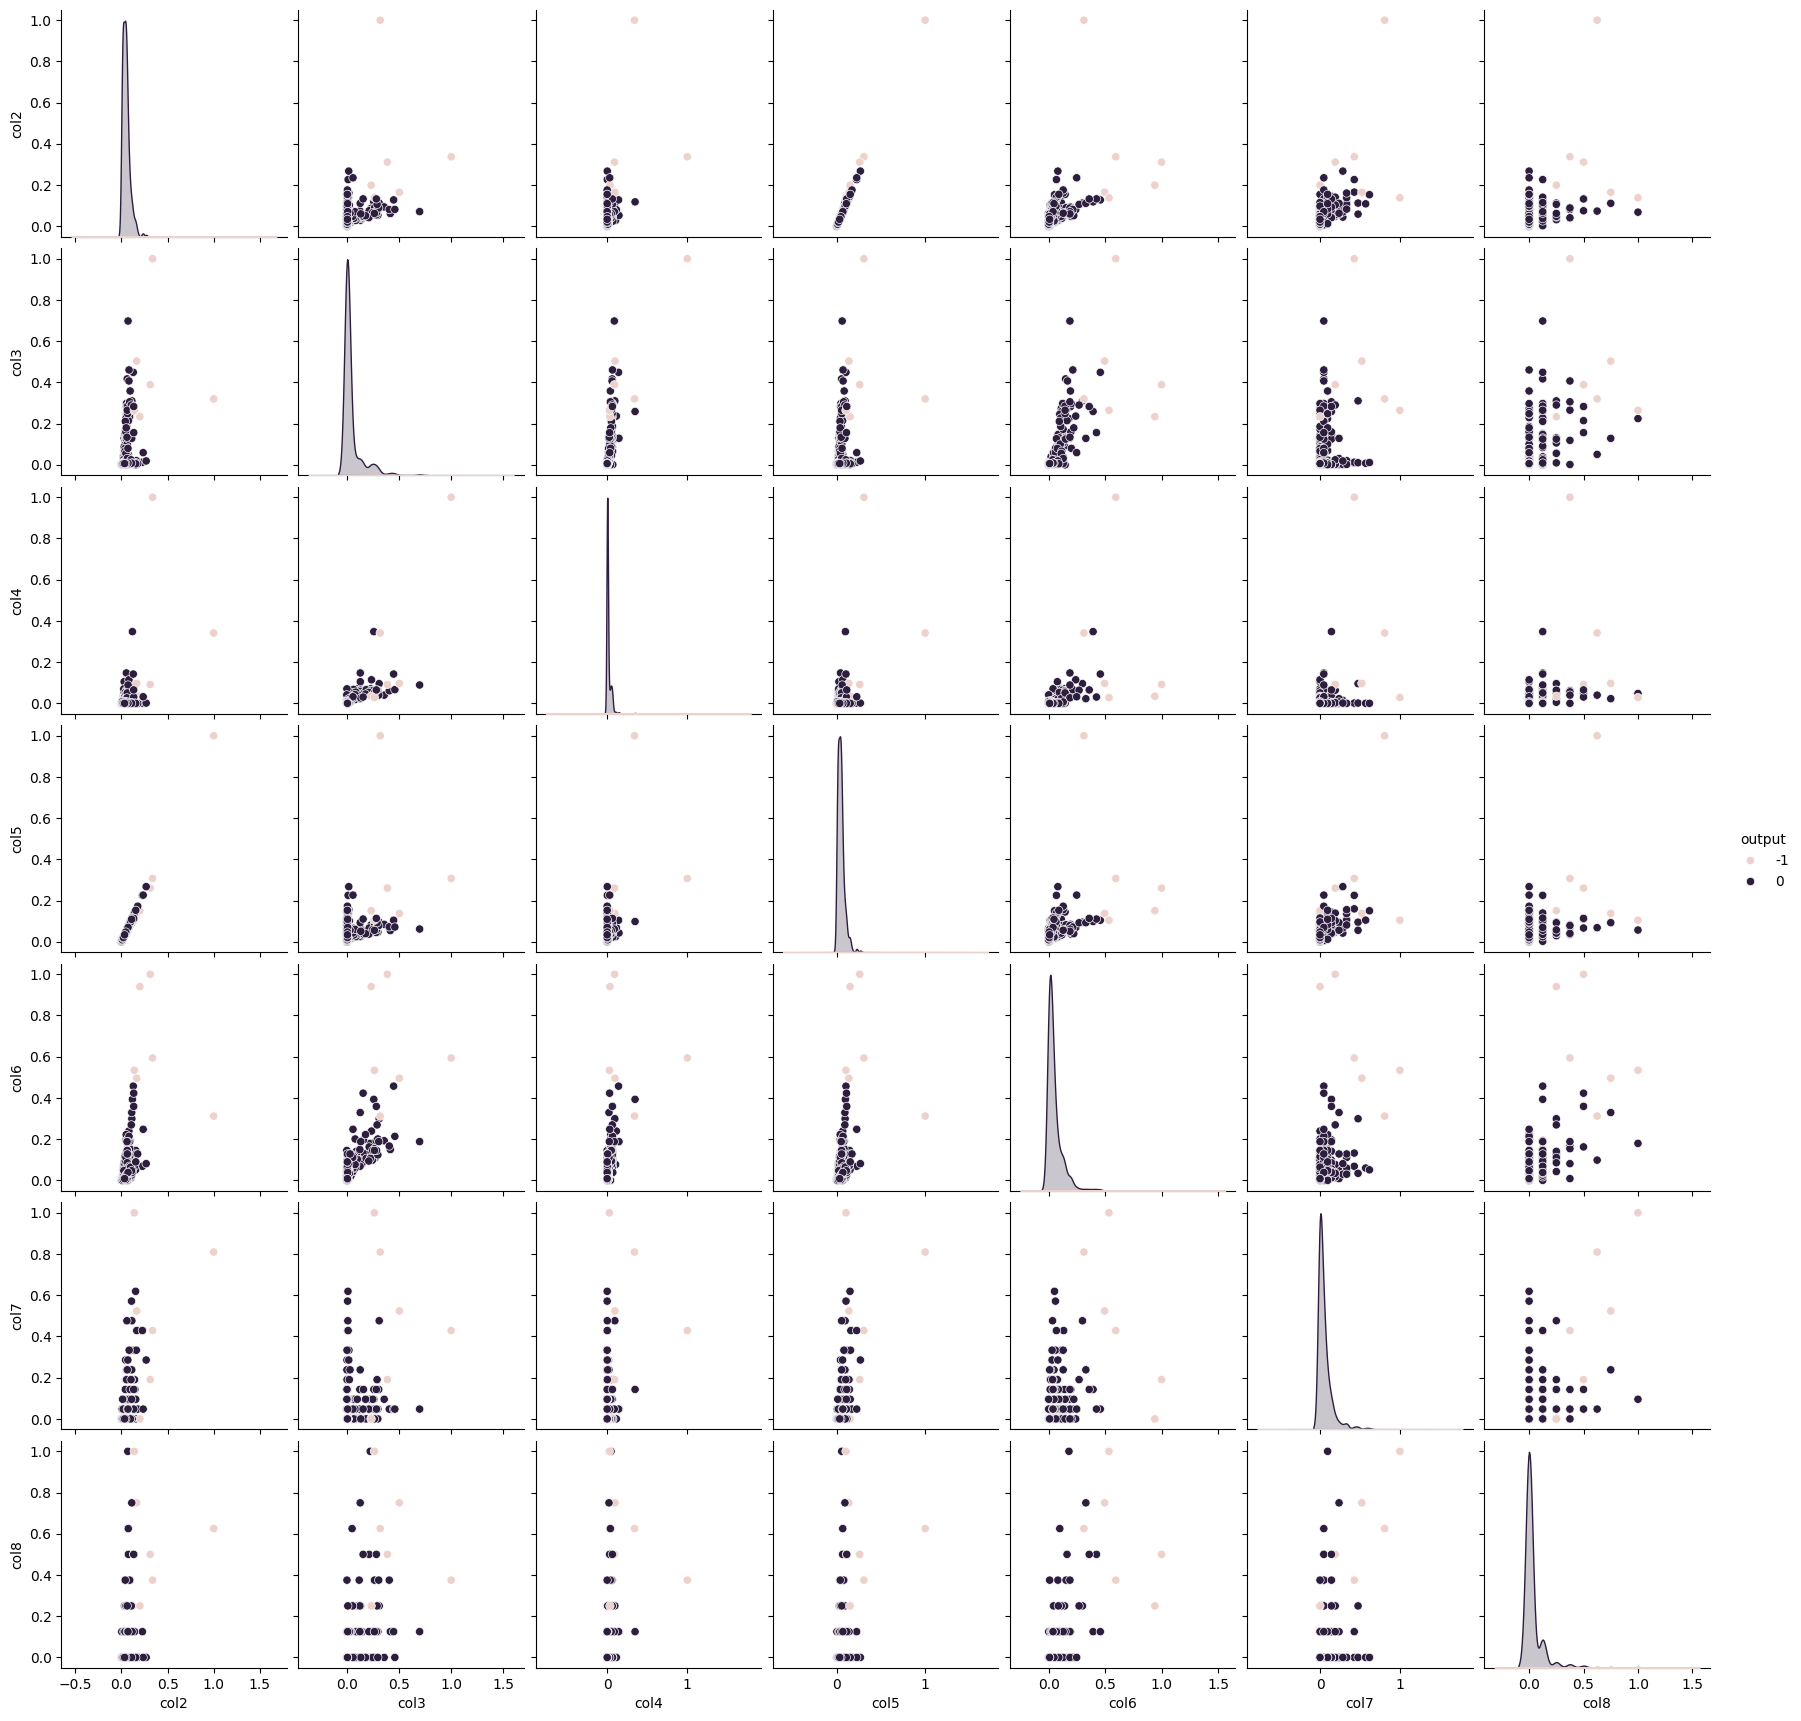

In [27]:
sns.pairplot(data=x, hue = 'output')
plt.show()